# <span style="color: orange;">AI in Action
</span>



# <span style="color: orange;">Introduction</span>
<p style="text-align: justify;">
In this project, we will explore the use of data and machine learning (Standard methods, RNN's & Transformers) to predict the success of negotiations, specifically in terms of negotiation acceptance or rejection, based on unstrucutred data provided to us by "Negoisst" - a software from our chair. By analyzing the given negotiation data, we aim to make a recommendation of a suitable model that can help us find an anwser to the research question: 

- **<span style="color: teal;">To what extent can the success of negotiations (in terms of negotiation acceptance or rejection) be predicted based on communication interaction data using NLP and Machine Learning techniques?
</span>**

This project is a collaborative effort by our four members: Maxim Gerassimenya, Theodoros Koletsis, Tarkan Yildirim, and Julius Hirsch.
</p>


## <span style="color: orange;">Agenda</span>
<p style="text-align: justify;">

1. **Data Exploration**
   - overall important stats (overall content/word length etc.)
   - Identifying key features and variables, standard NLP exploration approach (text statistics, distribution and length histograms/plots)
   - advanced data visualization (Topic Modeling, Sentiment Analysis, Named Entity Recognition)

2. **Data Cleansing**
   - Handling missing values, removing duplicates
   - Correcting data inconsistencies (lowercasing, stopword removal etc.)

3. **Pre-processing**
   - using lemmatization and tokenization for clear distirbution of content
   - creating mulitple df for later use
   - preprpcessing dataset for machine learning algorithm and RNN's

4. **Ex-Post Analysis**
   - comparison of pre-cleansing results and post-cleansing
   - possible interpretations and implications for modeling transition

5. **Representation Techniques**
   - Text representation methods (BagOfWords, TF-IDF, word embeddings)
   - Feature engineering
   - Optimization and Overfitting Tests
  

6. **Modeling of Data**
   - Standard ML Models ( Random Forest, XGBoost, Naive Bayes, Logistic Regreesion, SVM)
   - Neural Networks (LSTM, RNN, Elman RNN, GRU)
   - Transformers (DistilBert, DistilRoberta)
</p>

## <span style="color: orange;">1. Data Exploration</span>

For our data exploration process, we started by examining the overall statistics of the dataset, including key metrics like total word count, average document length, and word length distribution. These stats gave us a good understanding of the size and complexity of the content, allowing us to better plan our next steps for analysis. We used a standard NLP exploration approach that involved calculating text statistics, such as word frequency, sentence length, and the presence of stop words. To visualize these statistics, we created distribution plots and histograms to assess patterns, identify any outliers, and understand the general structure of the text. These visualizations provided insights into how the data is distributed and where we might need to adjust our preprocessing steps.

In addition to basic analysis, we applied more advanced data visualization techniques to uncover deeper insights. We used topic modeling to identify underlying themes within the text, which helped us understand the key topics discussed across the documents. Additionally, we performed a sentiment analysis to assess the overall sentiment of the text—whether it was positive, neutral, or negative. Finally, we employed Named Entity Recognition (NER) and Part of Speech (POS) tagging to identify specific entities such as names, dates, and locations within the text. This added another layer of information to our analysis and also allowed us to draw meaningful connections between the quantitative aspects of our analysis and the theoretical framework, particularly in relation to speech acts as described by Searle (1980).

We will begin by importing the functions of our separte .py file to load all packages and ensure the file is replicable for everybody that uses it.

In [1]:
from Model_Comparison import install_and_import_packages

# Call the function to install and import packages
install_and_import_packages()

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read xsl file
df = pd.read_excel('Group1.xlsx')

In [3]:
df # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


#####  **<span style="color: orange;">Missing values and Duplicates</span>**

In [4]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [5]:
# remove missing values from the cleansed dataset
df = df.dropna()

In [6]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df and drop them
duplicates = df[df.duplicated()]
duplicates

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
215,965,966,Counteroffer,FinalAccept,"Dear Mr.Novak, \nI am so glad both of our side..."
270,1105,1106,Counteroffer,FinalReject,"Dear Ms. Novak, \nI assure you that there is n..."
400,1441,1442,Counteroffer,FinalReject,Thank you for sending me your first offer. Alt...
470,1833,1834,FinalAccept,FinalAccept,"So, Ms. Novak, this is our official acceptance..."
731,3037,3038,Counteroffer,FinalAccept,"Dear Mr. Novak, \nI would really like to close..."
929,3877,3878,Counteroffer,FinalAccept,"Dear Sasa, of course you agree with the direct..."
1555,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."
1747,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."


In [7]:
#drop all the duplicates
df = df.drop_duplicates()

# Check for duplicates
df.duplicated().sum()

0

<p style="text-align: justify;">
The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that we will remove to reduce redundant content we want every content to be unique.
</p>

## **<span style="color: orange;"> Analyzing text statistics</span>**

For starters, we will begin with standard exploration techniques in NLP data epxloration as mentioned in the beginning of this chapter, this includes the following:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**

The insights to these standard data will help us identify any patterns that we may consider preprocess further. We want to identify important features of the content/text data.

In [8]:
# Check the length of the content
df["length"] = df["Content"].str.len()
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917


In [9]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount_basic'] = df['Content'].apply(word_count)
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343


In [10]:
df["NegoOutcome"].value_counts() 

NegoOutcome
FinalAccept    1598
FinalReject     726
Name: count, dtype: int64

<p style="text-align: justify;">
The results indicate that the data is somewhat imbalanced, with <span style="color: teal;"> 1598 accepted messages</span>  and <span style="color: teal;"> 726 rejected messages</span> . Our next step is to create new columns that contain the text of accepted and rejected messages. Additionally, we are interested in examining the distribution of labels across the entire dataset. Specifically, we want to identify the number of offers and counteroffers within the dataset. This is important because we plan to remove observations that could bias our results or final predictions, such as messages already labeled as FinalReject or FinalAccept. Although these messages clearly indicate the outcome from the beginning, it is crucial to include some of them in our training and test data to verify our predictions.
</p>

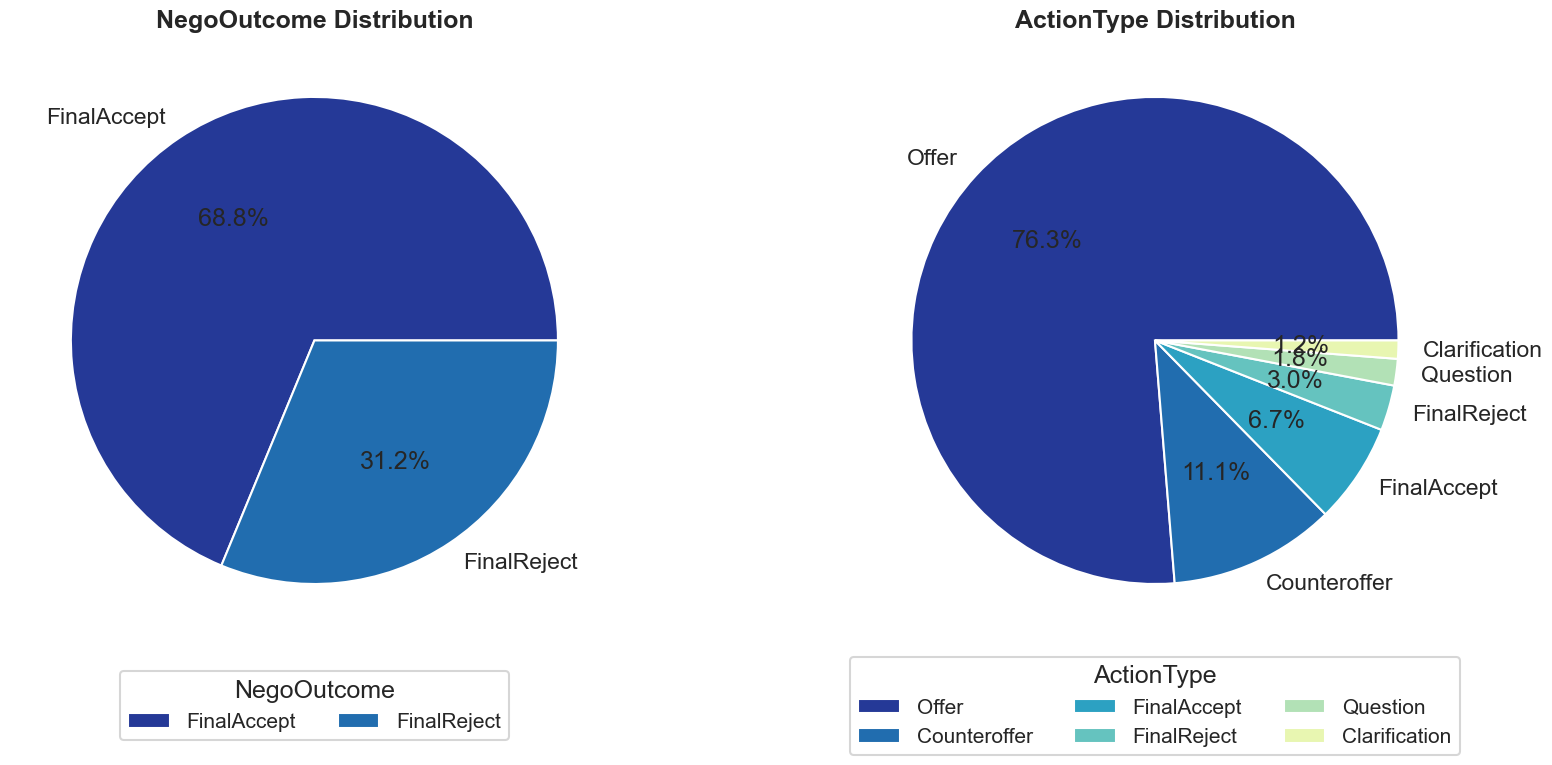

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette from colorbrewer and reverse it
colors = sns.color_palette("YlGnBu")[::-1]

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(18, 8))

# Plot for NegoOutcome
plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcome'].value_counts(), labels=df['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('NegoOutcome Distribution', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('ActionType Distribution', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Show the plots
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
The given pie charts provide valuable insights into the negotiation outcomes and actions. In the NegoOutcome Distribution, <span style="color:teal;">68.8%</span> of negotiations end in <span style="color:teal;">FinalAccept</span>, while <span style="color:teal;">31.2%</span> result in <span style="color:teal;">FinalReject</span>. This suggests a generally positive trend but also highlights the need to reduce rejection rates. The ActionType Distribution shows that most actions (<span style="color:teal;">76.3%</span>) are <span style="color:teal;">Offers</span>, indicating that negotiations are mainly driven by direct proposals. <span style="color:teal;">Counteroffers</span> make up <span style="color:teal;">11.1%</span>, reflecting some level of back-and-forth negotiation. <span style="color:teal;">FinalAccept</span> (<span style="color:teal;">6.7%</span>) and <span style="color:teal;">FinalReject</span> (<span style="color:teal;">3.0%</span>) represent the decisions made during the negotiation process. <span style="color:teal;">Clarifications</span> (<span style="color:teal;">1.2%</span>) and <span style="color:teal;">Questions</span> (<span style="color:teal;">1.8%</span>) are minimal, suggesting that there is little focus on probing or clarifying details. Overall, the high acceptance rate indicates successful negotiations, but incorporating more clarifications and questions could potentially reduce rejections by ensuring better alignment and understanding between parties.</p>

In [12]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [13]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [14]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1598, 726)

<p style="text-align: justify;">
Until now, we have noted that the dimensions are the same, but there are some inconsistencies in the text messages that need to be addressed. For example, there are persistent markers like /n or "" that need to be removed as they can influence our results. We will address this in the data cleansing part, ensuring that these biased characters are removed to prevent inaccurate predictions in the future.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

<p style="text-align: justify;">
In the following part, we will briefly generalize the data and create a small summary of statistics for some relevant values that may change after our cleansing process. These statistics will help us interpret our results better and explain the changes and differences observed.
</p>


In [15]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure the necessary NLTK resources are downloaded (if not already)
nltk.download('punkt')

# Apply word_tokenize to count words
def word_count_nltk(text):
    # Tokenize the text and count the number of tokens (words)
    tokens = word_tokenize(text)
    return len(tokens)

# Calculate the total word count for accepted messages
accepted_word_count_sum = accepted_messages.apply(word_count_nltk).sum()

# Calculate the total word count for rejected messages
rejected_word_count_sum = rejected_messages.apply(word_count_nltk).sum()

# Calculate the overall total word count
total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

# Calculate the percentage of words in accepted and rejected messages
if total_word_count_sum > 0:
    accepted_word_count_percentage = (accepted_word_count_sum / total_word_count_sum) * 100
    rejected_word_count_percentage = (rejected_word_count_sum / total_word_count_sum) * 100
else:
    accepted_word_count_percentage = 0
    rejected_word_count_percentage = 0

# Create a DataFrame to display the results
word_count_data = {
    'Accepted Word Count': [accepted_word_count_sum],
    'Rejected Word Count': [rejected_word_count_sum],
    'Total Word Count': [total_word_count_sum],
    'Accepted Word Count (%)': [accepted_word_count_percentage],
    'Rejected Word Count (%)': [rejected_word_count_percentage]
}

# Save df for ex post analysis
word_count_df = pd.DataFrame(word_count_data)

# Display the results
word_count_df


[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Accepted Word Count,Rejected Word Count,Total Word Count,Accepted Word Count (%),Rejected Word Count (%)
0,389223,207280,596503,65.250803,34.749197


<p style="text-align: justify;">
In total, there are <span style="color: teal;">536693</span> words present in the dataset. The accepted word count makes up <span style="color: teal;">65%</span>, while the rejected word count makes up nearly <span style="color: teal;">35%</span>. We are sure that after cleansing, there is going to be a big difference after removing specific words, stopwords, openings, and closings.
</p>

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

# Adding aditional parameters to the current df based on the nltk library
df['Content_Length'] = df['Content'].apply(len)
df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

# Calculate averages
average_content_length = df['Content_Length'].mean()
average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
average_word_length = df['Content_Length'].sum() / df['Word_Count_nltk'].sum()


print(f"Average Content Length: {average_content_length}")
print(f"Average Sentence Length: {average_sentence_length}")
print(f"Average Word Length: {average_word_length}")

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Content Length: 1291.5955249569708
Average Sentence Length: 98.42825288562435
Average Word Length: 5.032108807499711


<p style="text-align: justify;">

The results show that:
- Average Content Length: **<span style="color: teal;">1291.42 characters.</span>** This indicates that, on average, each piece of content in the dataset is approximately 1291 characters long, including all letters, numbers, and punctuation.  

- Average Sentence Length: **<span style="color: teal;">98.43 characters.</span>**. This shows that, on average, each sentence in the content is about 98 characters long, giving an idea of the typical sentence length in the dataset.  

- Average Word Length: **<span style="color: teal;">5.03 characters.</span>** This suggests that, on average, each word in the content is about 5 characters long, which is typical for English text.

It would be interesting to see how the averages change if we remove stopwords and further inconsistencies in the data since those may bias the given results right now but we also want to see if there is any difference between the accepted and rejected messages.
</p>

It would be nice to see if there are any negotiation messages that have amount of words less then the average of words that are needed to complete a sentence to see if the users did not provide enough information or sent a wrong message.

In [17]:

# Define a function to calculate the total word count based on 'Word_Count_nltk' column
def total_word_count_nltk(df):
    """
    Calculate the total word count by summing the 'Word_Count_nltk' values for all observations.
    """
    return df['Word_Count_nltk'].sum()

# Calculate the total word count based on 'Word_Count_nltk'
total_word_count_nltk_sum = total_word_count_nltk(df)

# Print the total word count
print(f"Total word count (based on 'Word_Count_nltk') for all observations: {total_word_count_nltk_sum}")



Total word count (based on 'Word_Count_nltk') for all observations: 596503


We've noticed that some messages are unintentionally sent with just a "." or very few words, meaning they don't contain any useful information. Since these messages don't add much to our analysis, it makes sense to exclude them. During the data cleansing process, once we've removed special characters and common phrases found in these short messages, they'll be automatically filtered out. This will help us avoid any misleading interpretations later on.

In [18]:
# Calculate total content length, sentence count, and word count for accepted and rejected content
total_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].sum()
total_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].sum()
total_sentence_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].sum()
total_sentence_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].sum()
total_word_count_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].sum()
total_word_count_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].sum()

# Calculate average sentence length and average word length for accepted and rejected content
average_sentence_length_accepted = total_content_length_accepted / total_sentence_count_accepted
average_sentence_length_rejected = total_content_length_rejected / total_sentence_count_rejected
average_word_length_accepted = total_content_length_accepted / total_word_count_accepted
average_word_length_rejected = total_content_length_rejected / total_word_count_rejected

print(f"Average Sentence Length (Accepted): {average_sentence_length_accepted}")
print(f"Average Sentence Length (Rejected): {average_sentence_length_rejected}")
print(f"Average Word Length (Accepted): {average_word_length_accepted}")
print(f"Average Word Length (Rejected): {average_word_length_rejected}")

Average Sentence Length (Accepted): 98.65122258633728
Average Sentence Length (Rejected): 98.01341337585592
Average Word Length (Accepted): 5.027315960259286
Average Word Length (Rejected): 5.041108645310691


<p style="text-align: justify;">
We note that the average character length in total is very similar in both, accepted and rejected messages so this shows us that the users are using the same amount of words and sentences in both cases. However, we will need to further analyze the data to see if there are any differences in the content that may help us predict the outcome of the negotiation.
</p>

### **<span style="color: orange;"> Plotting average lengths</span>**
<p style="text-align: justify;">
The following plots show the distribution of content length in the dataset. The dashed line indicates the average content length, this shouls serve just as a simple visualization of our calculated averages form above but with the focus on the distribution to make clear in which intervals we are moving.
</p>

In [19]:
# We Calculate the averages for accepted and rejected content to include them into  our graphics
average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].mean()
average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].mean()
average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].mean()
average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].mean()
average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].mean()
average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].mean()

# Calculate overall averages
average_content_length_overall = df['Content_Length'].mean()
average_sentence_length_overall = df['Sentence_Count'].mean()
average_word_length_overall = df['Word_Count_nltk'].mean()

In [20]:
# Defining legend markers for the two specific negotiation outcomes
outcome_lines = [
    Line2D([0], [0], color='darkblue', linestyle='solid', linewidth=2, label='FinalAccept'),
    Line2D([0], [0], color='darkorange', linestyle='solid', linewidth=2, label='FinalReject')
]

#### **<span style="color: orange;">Histogram Content Length</span>**

In [21]:
# Defining legend markers for the averages
average_lines_content = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_content_length:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_content_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_content_length_rejected:.2f}')
]

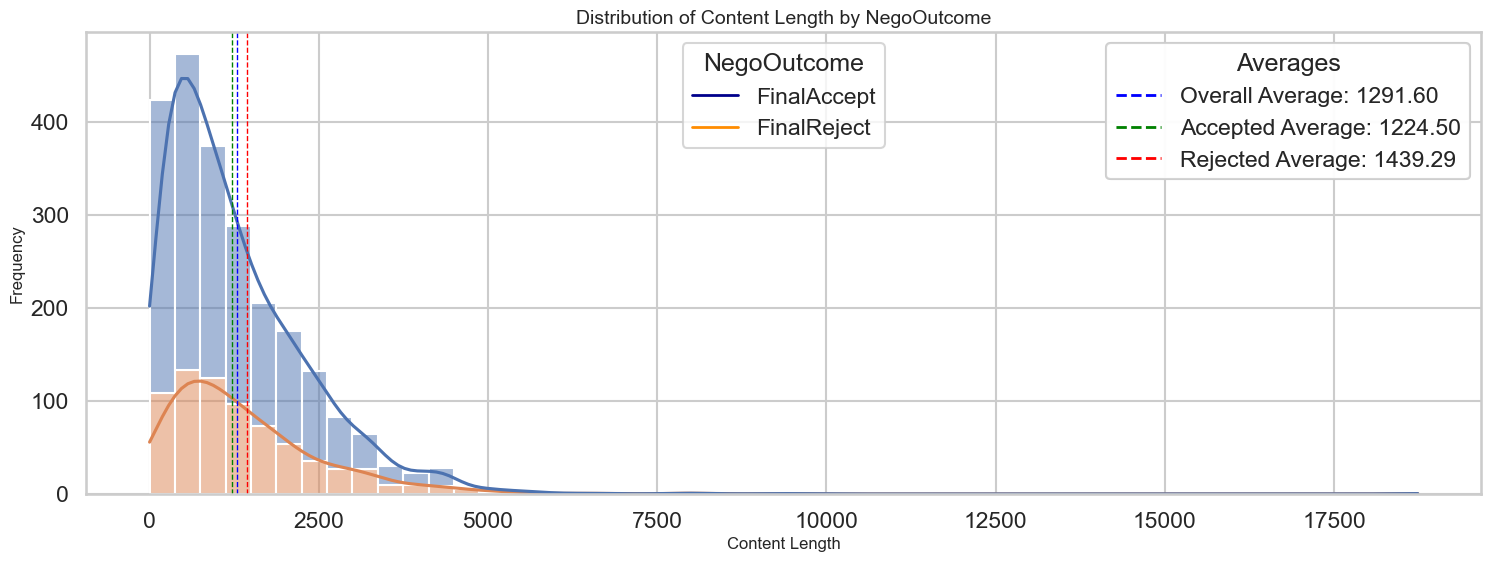

In [22]:
# Plot histogram of content length
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Content_Length', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_content_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_content_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average content lengths
second_legend = plt.legend(handles=average_lines_content, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Content Length by NegoOutcome', fontsize=14)
plt.xlabel('Content Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The content length distribution is highly right-skewed, indicating that the majority of contents are relatively short, with only a small proportion of longer entries.
The Accepted Average (<span style="color: teal;">1224.50</span>) is noticeably lower than both the Overall Average (<span style="color: teal;">1291.60</span>) and the Rejected Average (<span style="color: teal;">1439.29</span>). This suggests that shorter content lengths are more likely to lead to acceptance. Rejected content tends to be longer: The higher Rejected Average (<span style="color: teal;">1439.29</span>) indicates that verbosity or excessive content length might be a factor in rejection. The results imply that focusing on concise communication may improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.
</p>

#### **<span style="color: orange;"> Histogram Sentence Count</span>**

In [23]:
average_lines_sentence = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_sentence_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_sentence_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_sentence_length_rejected:.2f}')
]

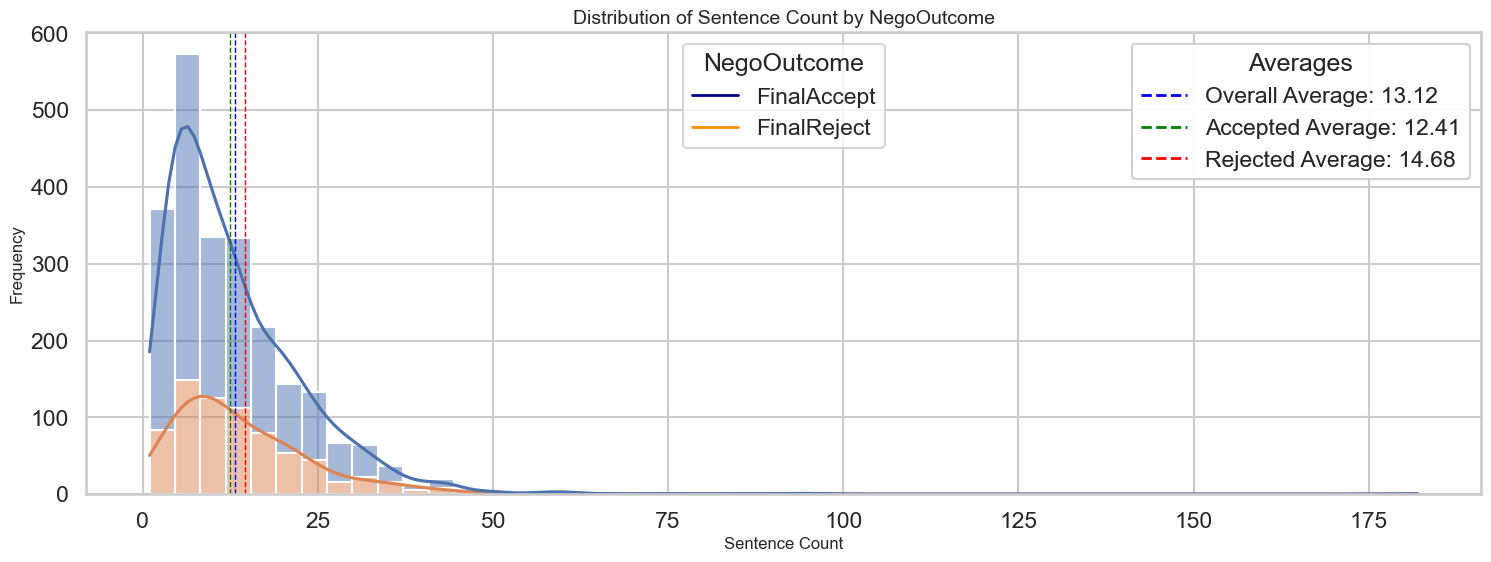

In [24]:
# Plot histogram of sentence count
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Sentence_Count', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_sentence_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_sentence_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average sentence lengths
second_legend = plt.legend(handles=average_lines_sentence, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Sentence Count by NegoOutcome', fontsize=14)
plt.xlabel('Sentence Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
Like content length, sentence counts follow a right-skewed distribution, with most content having a small number of sentences.
The Accepted Average (<span style="color: teal;">12.41</span>) is lower than the Overall Average (<span style="color: teal;">13.12</span>), while the Rejected Average (<span style="color: teal;">14.68</span>) is higher. This reinforces the trend that concise content, even at the sentence level, is more likely to be accepted.
Key Insight: Rejected content often has slightly more sentences (<span style="color: teal;">14.68</span> on average), compared to accepted content (<span style="color: teal;">12.41</span> on average). This suggests that even a modest increase in sentence count could contribute to rejection, possibly due to reduced clarity or over-explaining.
Aiming for fewer sentences (closer to the Accepted Average) can help ensure that the content is succinct and easy to read.
</p>

####  **<span style="color: orange;">Histogram Word Count </span>**

In [25]:
average_lines_word = [
    Line2D([0], [0], color='blue', linestyle='dashed', linewidth=2, label=f'Overall Average: {average_word_length_overall:.2f}'),
    Line2D([0], [0], color='green', linestyle='dashed', linewidth=2, label=f'Accepted Average: {average_word_length_accepted:.2f}'),
    Line2D([0], [0], color='red', linestyle='dashed', linewidth=2, label=f'Rejected Average: {average_word_length_rejected:.2f}')
]

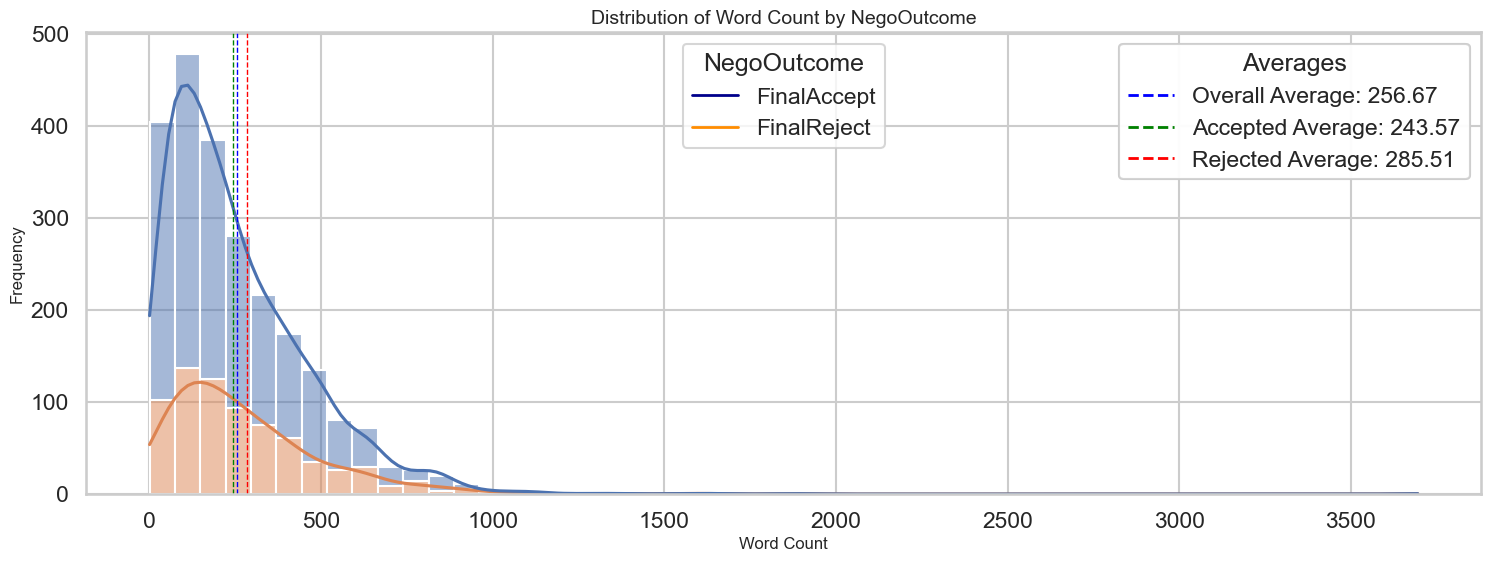

In [26]:
# Plot histogram of word count
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Word_Count_nltk', hue='NegoOutcome', multiple='stack', bins=50, kde=True)
plt.axvline(average_word_length_overall, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_accepted, color='green', linestyle='dashed', linewidth=1)
plt.axvline(average_word_length_rejected, color='red', linestyle='dashed', linewidth=1)

# Add the first legend for negotiation outcomes
first_legend = plt.legend(handles=outcome_lines, loc='upper center', title='NegoOutcome')
plt.gca().add_artist(first_legend)

# Add the second legend for average word lengths
second_legend = plt.legend(handles=average_lines_word, loc='upper right', title='Averages')
plt.gca().add_artist(second_legend)

plt.title('Distribution of Word Count by NegoOutcome', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<p style="text-align: justify;">
The word count distribution shows a similar pattern of right skew, with most content containing fewer words.
The Accepted Average (<span style="color: teal;">243.57</span>) is lower than both the Overall Average (<span style="color: teal;">256.67</span>) and the Rejected Average (<span style="color: teal;">285.51</span>). This clearly indicates that shorter word counts are associated with higher acceptance rates.
Rejected content tends to be wordier: The Rejected Average (<span style="color: teal;">285.51</span>) suggests that excessive wordiness or lack of precision in content could negatively impact acceptance.
Focusing on concise wording, aiming for a word count closer to the Accepted Average (<span style="color: teal;">243.51</span>), may increase the likelihood of acceptance.
</p>

<p style="text-align: justify;"> 

**General Trends Across all three Graphs**
- **Skewness:** All three metrics (content length, sentence count, and word count) exhibit a **right-skewed distribution**, indicating that most content is relatively short, with a few longer entries.

- **Impact of Length:** Shorter content—measured by length, sentences, or words—tends to be associated with **higher acceptance rates**, while longer content is more likely to be rejected.

- **Practical Insight:** The results suggest that **concise communication** is crucial for content acceptance. Focusing on compact messages and clarity in writing can improve acceptance rates, as shorter content aligns with the typical pattern of successful submissions.

In total we note that all three graphs tend to have the same trend that indicates that they correlate with each other. More sentences lead to more words etc.
</p>

In [27]:
df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376
...,...,...,...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest...",1755,338,1755,21,358
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you...",1460,263,1460,17,294
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans...",673,133,673,10,144
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ...",969,171,969,9,191


NegoOutcomeLabel is being included as a new column for later use in our predictions as our target variable since NegoOutcome itself is a string but we need a binary integer variable 0/1.

In [28]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376,1


### **<span style="color: orange;"> Word Cloud  </span>**

Now, of particular interest is the distribution of specific words within the accepted and rejected messages, as well as their frequency. To explore this further, we decided to create two word clouds—one for each message type. These word clouds will highlight the most important words and may help us uncover potential connections between the content of the messages, their relationships, or key features that are significant to our analysis.

In [29]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


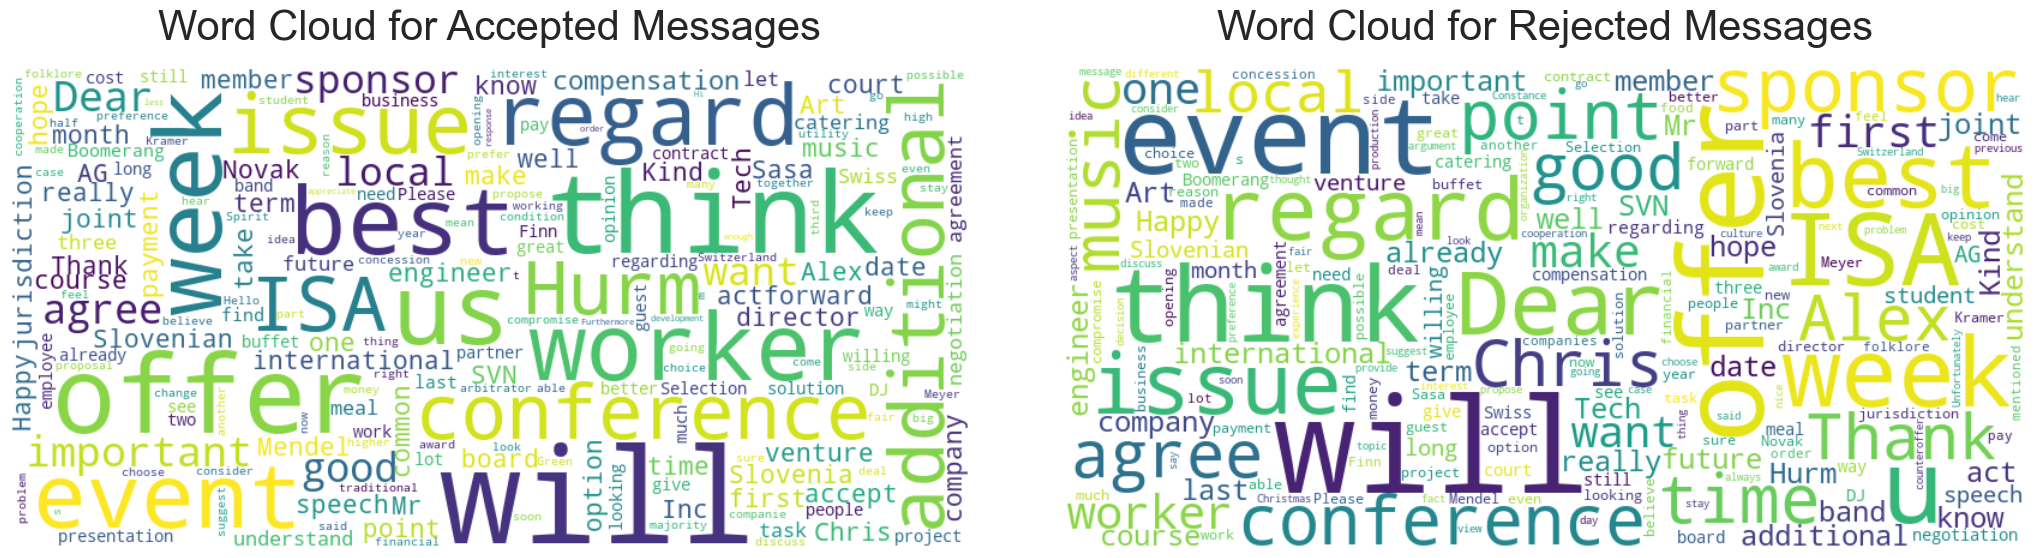

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud separately for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(rejected_messages))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30, pad=20)
ax1.axis('off')
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30, pad=20)
ax2.axis('off')
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

plt.show()

<p style="text-align: justify; color: teal;">
1. Accepted messages:</p> They focus on actionable and professional terms like "conference," "event," "agree," and "important." Positive words such as "best" and "additional" suggest clarity and prioritization. Names like "Alex" and "Slovenian" indicate personalization, which might contribute to acceptance.


<p style="text-align: justify; color: teal;">
2. Rejected messages:</p> Here they contain speculative words like "think," "offer," "want," and "make," reflecting a less decisive tone. Context-specific terms like "music" and "Dear" suggest formality or irrelevant focus, which may lead to rejection.


<p style="text-align: justify;">
In both wordclouds we note that nouns like "Alex" and "Slovenian" may introduce noise and can be filtered out during preprocessing to focus on meaningful terms. Evaluating the relevance of terms like "ISA" or "conference" can further refine the dataset for better analysis since these organization names build a base to understand the issues both parties are negotiating about.
</p>
 

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words (Tong & Zhang, 2016). Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.
</p>



In [31]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

Now, we will create a function that preprocesses some of the content in the respective DataFrame, so that topic modeling analysis can be applied effectively, particularly with regard to the removal of stopwords. However, it's important to note that this function does not modify the original dataset. The preprocess_df() function tokenizes the 'Content' column, removes stopwords, lemmatizes the words, and discards short words.

In [32]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# here we create a function to preprocess the content before the actual preprocessing part
def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The original df DataFrame remains unchanged, and the processed words are returned as a separate list (corpus). The overall preprocessing steps follow as mentioned in the agenda in chapter 3.

In [33]:
%pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
# import gensim corpus
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [35]:
# set the model parameters
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 6,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.018*"offer" + 0.013*"think" + 0.010*"would" + 0.009*"week" + 0.008*"Alex" + 0.008*"Chris" + 0.008*"issue" + 0.007*"one" + 0.007*"make" + 0.007*"n\'t"'),
 (1,
  '0.019*"would" + 0.012*"worker" + 0.011*"Hurm" + 0.009*"Slovenia" + 0.009*"SVN" + 0.009*"company" + 0.009*"engineer" + 0.008*"board" + 0.008*"additional" + 0.008*"Slovenian"'),
 (2,
  '0.016*"offer" + 0.015*"Dear" + 0.013*"Novak" + 0.012*"SVN" + 0.012*"Mendel" + 0.012*"Tech" + 0.011*"Hurm" + 0.010*"Finn" + 0.010*"Sasa" + 0.010*"regard"'),
 (3,
  '0.024*"would" + 0.012*"Alex" + 0.012*"event" + 0.012*"Chris" + 0.012*"week" + 0.012*"ISA" + 0.011*"think" + 0.010*"conference" + 0.009*"regard" + 0.007*"issue"'),
 (4,
  '0.022*"would" + 0.017*"event" + 0.014*"ISA" + 0.014*"think" + 0.010*"week" + 0.008*"conference" + 0.008*"offer" + 0.008*"Art" + 0.007*"like" + 0.007*"Alex"'),
 (5,
  '0.025*"worker" + 0.017*"offer" + 0.016*"compensation" + 0.014*"additional" + 0.014*"would" + 0.013*"Hurm" + 0.012*"common" + 0.010*"Dear" + 0.0

In [36]:
# Install pyLDAvis
%pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pyLDAvis.gensim

# Visualize the selected topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.141644 -0.029788       1        1  37.146243
1     -0.109230 -0.045104       2        1  26.750736
5     -0.108314 -0.032779       3        1  12.329128
0      0.068058  0.005654       4        1  10.298467
3      0.108087  0.026804       5        1   8.882225
2     -0.100245  0.075214       6        1   4.593200, topic_info=        Term         Freq        Total Category  logprob  loglift
167   worker  1696.000000  1696.000000  Default  30.0000  30.0000
13      Hurm  1327.000000  1327.000000  Default  29.0000  29.0000
2604   event  2092.000000  2092.000000  Default  28.0000  28.0000
475    offer  2621.000000  2621.000000  Default  27.0000  27.0000
6408     ISA  1783.000000  1783.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
169    would   116.582533  4916.033434   Topic6  -4.6370  -0.6611
82    future    54.633507   773.093642   Topic6  -5.3950   0.4308
726    think    63.740233  2647.966698   Topic6  -5.2408  -0.6461
688   accept    50.317637   722.246493   Topic6  -5.4773   0.4166
40      best    52.359019  1117.446005   Topic6  -5.4375   0.0199

[498 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9737      5  0.864479     'week
2058      1  0.265006       ...
2058      2  0.099377       ...
2058      3  0.132503       ...
2058      4  0.430635       ...
...     ...       ...       ...
169       4  0.056550     would
169       5  0.111879     would
169       6  0.023800     would
4757      6  0.800706  you.With
3517      6  0.608473      Šimi

[1252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 6, 1, 4, 3])

The topic modeling analysis reveals distinct themes across the text data: 

- <span style="color: teal;">**Topic 1**</span> revolves around employment and compensation, with dominant terms such as "worker," "compensation," and "additional." Mentions of specific regions ("Slovenia," "SVN") and names ("Hurm") suggest a localized or regional focus. The frequent use of "would" indicates proposal-driven discussions, reflecting speculative language related to future possibilities.

- <span style="color: teal;">**Topic 2**</span> focuses on event planning and organization, highlighted by key terms like "event," "conference," "week," and "offer." Proper nouns such as "ISA" and "Alex" point to specific participants or entities involved in the discussion. The recurrence of words like "would" and "think" highlights speculative or future-oriented language, typical of discussions about upcoming events or decisions.

- <span style="color: teal;">**Topic 3**</span> centers on formal communication in negotiations, with words like "offer," "Dear," "regard," and "agreement." This topic is closely tied to outcomes and decision-making, with terms such as "accept" and "negotiation" underscoring its formal tone and intent to reach agreements.

- <span style="color: teal;">**Topic 4**</span>  is related to Topic 2, as the two topics overlap, particularly in terms of event planning and the language associated with it.

- **Topics 5 & 6** are too small to be considered significant in this analysis.

Across all topics, the consistent use of the word "would" points to the speculative nature of the communications, highlighting uncertainty or future possibilities. Proper nouns like "ISA," "Alex," "Slovenia," and "Chris" are context-specific and might be filtered during preprocessing, as they do not contribute to broader thematic understanding.

In [38]:
from collections import Counter

# Print the most frequent words and their percentage values with stopwords
def print_frequent_words(messages, title):
    word_counts = Counter(' '.join(messages).split())
    total_words = sum(word_counts.values())
    print(f"\n{title}")
    print("Word\t\tFrequency\tPercentage")
    for word, count in word_counts.most_common(20):
        percentage = (count / total_words) * 100
        print(f"{word}\t\t{count}\t\t{percentage:.2f}%")

print_frequent_words(accepted_messages, "Most Frequent Words in Accepted Messages")
print_frequent_words(rejected_messages, "Most Frequent Words in Rejected Messages")


Most Frequent Words in Accepted Messages
Word		Frequency	Percentage
the		17572		5.01%
to		11344		3.24%
I		8994		2.57%
of		8620		2.46%
and		6677		1.91%
a		6278		1.79%
you		5997		1.71%
for		5856		1.67%
we		5840		1.67%
that		5564		1.59%
in		5311		1.52%
is		5056		1.44%
be		3577		1.02%
would		3415		0.97%
our		3331		0.95%
your		3290		0.94%
have		2954		0.84%
this		2917		0.83%
with		2867		0.82%
will		2810		0.80%

Most Frequent Words in Rejected Messages
Word		Frequency	Percentage
the		9188		4.93%
to		6044		3.25%
I		4667		2.51%
of		4425		2.38%
and		3668		1.97%
a		3484		1.87%
you		3172		1.70%
we		2951		1.58%
for		2874		1.54%
in		2834		1.52%
that		2817		1.51%
is		2777		1.49%
our		1878		1.01%
your		1785		0.96%
be		1765		0.95%
this		1687		0.91%
have		1626		0.87%
would		1592		0.85%
with		1539		0.83%
not		1424		0.76%


<p style="text-align: justify;">
It's already evident that the most common words are pronouns, auxiliary verbs, and prepositions, and not a lot of organizations and names since they do not fall into the top 20 of the list. This makes total sense since these words are used more often in every sentence. It would be interesting to see how this will change after removing the stopwords for the analysis since they bias the results.
</p>


In [39]:
from collections import Counter
from wordcloud import STOPWORDS

# Ensure stop_words is a set for faster lookup
stop_words = set(STOPWORDS)

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Print the most frequent words and their percentage values
def print_frequent_words(messages, title):
    words = ' '.join(messages).split()
    words = remove_stopwords(words)
    word_counts = Counter(words)
    total_words = sum(word_counts.values())
    print(f"\n{title}")
    print("Word\t\tFrequency\tPercentage")
    for word, count in word_counts.most_common(10):
        percentage = (count / total_words) * 100
        print(f"{word}\t\t{count}\t\t{percentage:.2f}%")

print_frequent_words(accepted_messages, "Most Frequent Words in Accepted Messages")
print_frequent_words(rejected_messages, "Most Frequent Words in Rejected Messages")


Most Frequent Words in Accepted Messages
Word		Frequency	Percentage
will		2810		1.63%
think		1829		1.06%
offer		1066		0.62%
Dear		1040		0.60%
important		990		0.57%
Hurm		988		0.57%
agree		950		0.55%
us		924		0.53%
week		901		0.52%
want		854		0.49%

Most Frequent Words in Rejected Messages
Word		Frequency	Percentage
will		1334		1.46%
think		765		0.84%
Dear		558		0.61%
offer		555		0.61%
ISA		529		0.58%
us		492		0.54%
agree		429		0.47%
event		392		0.43%
good		389		0.42%
week		389		0.42%


<p style="text-align: justify;">
Now, the distribution appears noticeably different. The focus is more on auxiliary verbs like "will" and "think," as reflected in both the word cloud and our previous LDA topic analysis. Additionally, organizations and names, such as "ISA" and "Hurm," are prominent, along with common phrases used for openings and closings, like "Dear" and "best regards." We will also conduct an n-gram analysis to explore whether any patterns emerge among these frequently used words. However, it’s clear that these words stand out, even though they account for only a small percentage of the total word count. The word "will" has the highest percentage, appearing 1.63% of the time, which translates to 2,810 occurrences in the entire dataset.
</p>

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are contiguous sequences of n words, and we will analyze the most frequent n-grams to identify patterns that can provide deeper insights into the data. Before proceeding, we will ensure that stopwords are removed, as this is essential for obtaining reliable results. We believe that n-gram exploration will uncover valuable information about specific word clusters and the relationships between the semantics of words. This, in turn, will help us better understand the overall meaning of the messages and prepare the data for later stages of modeling. By identifying semantic meaning and distributing weights accordingly, we can improve the accuracy of predictions in the subsequent analysis.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words



In [41]:
# Define the function to print the top 5 n-grams with their percentage values
def print_top_ngrams_percentage(words_freq, sum_words, n=2):
    total_words = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
    top_ngrams = words_freq[:5]
    print(f"\nTop 5 {n}-grams")
    print("N-gram\t\tFrequency\tPercentage")
    for ngram, count in top_ngrams:
        percentage = (count / total_words) * 100
        print(f"{ngram}\t\t{count}\t\t{percentage:.2f}%")

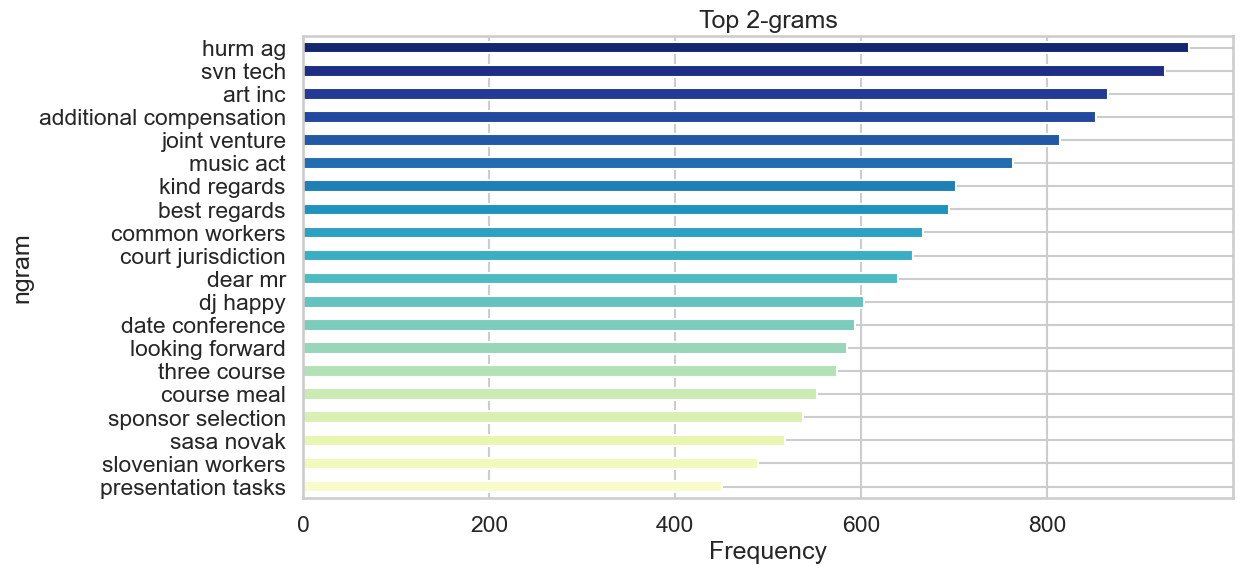


Top 5 2-grams
N-gram		Frequency	Percentage
hurm ag		952		0.38%
svn tech		926		0.37%
art inc		865		0.34%
additional compensation		852		0.34%
joint venture		814		0.32%


In [42]:
# Use the functions
words_freq, sum_words = plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams
print_top_ngrams_percentage(words_freq, sum_words, 2)

In [43]:
# calculate the total count of ngrams compared to the wordcount
total_word_count_bi = df['Word_Count_nltk'].sum()
total_ngram_count_bi = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
percentage_ngrams = (total_ngram_count_bi / total_word_count_bi) * 100
percentage_ngrams

42.14278888790165

<p style="text-align: justify;">
The chart displays the top 2-grams (also known as bi-gram) in our text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation." These bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). The selection of the top 20 n-grams allows us to capture a broad variety of themes and ensures a more comprehensive analysis of the data. By focusing on the top 20, we are able to identify key word pairs while also maintaining a balance in distribution across the entire content, preventing any one theme from overwhelming the analysis.

These observations align with previous data, highlighting that organizations like "HURM" and common phrases such as "Dear Mr/Mrs" often pair with closings like "best regards." Given that these common phrases do not constitute a significant portion of the dataset, it may be better to exclude them from further analysis. Including them could introduce bias into our results, as they do not contribute to the core semantic meaning of the messages and could skew the modeling process.</p>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words

In [45]:
# Define the function to print the top 5 n-grams with their percentage values
def print_top_ngrams_percentage(words_freq, sum_words, n=3):
    total_words = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
    top_ngrams = words_freq[:5]
    print(f"\nTop 5 {n}-grams")
    print("N-gram\t\tFrequency\tPercentage")
    for ngram, count in top_ngrams:
        percentage = (count / total_words) * 100
        print(f"{ngram}\t\t{count}\t\t{percentage:.2f}%")

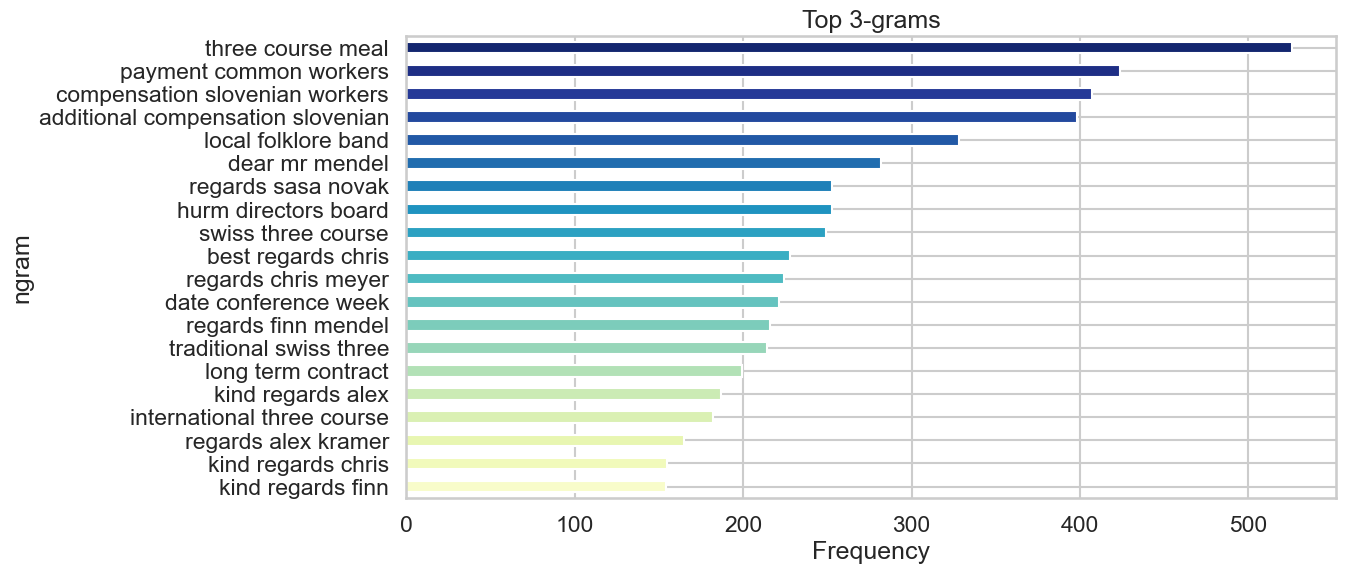


Top 5 3-grams
N-gram		Frequency	Percentage
three course meal		526		0.21%
payment common workers		424		0.17%
compensation slovenian workers		407		0.16%
additional compensation slovenian		398		0.16%
local folklore band		328		0.13%


In [46]:
# Use the functions
words_freq, sum_words = plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams
print_top_ngrams_percentage(words_freq, sum_words, 3)

In [47]:
# calculate the total count of ngrams compared to the wordcount
total_word_count = df['Word_Count_nltk'].sum()
total_ngram_count = sum(sum_words[0, idx] for idx in range(sum_words.shape[1]))
percentage_ngrams = (total_ngram_count / total_word_count) * 100
percentage_ngrams

41.75435831839907

Given that a substantial portion of the text consists of trigrams, it seems advantageous to continue incorporating them in our modeling and feature extraction. Trigrams provide more context than single words or bigrams (two-word sequences), which could be crucial for capturing deeper meaning in the data.

With 42.14% of the total text being made up of bigrams and 41,5% of trigrams, it’s clear that multi-word sequences play an important role in the dataset. This suggests that the combined meaning of words in n-grams may offer more insight than isolated words alone. However, depending on our specific objectives, we should also consider whether the prevalence of bigrams or trigrams is influencing the analysis too heavily, especially if some of these n-grams are generic phrases (e.g., "best regards," "thank you") that don’t contribute much to the core analysis. In such cases, excluding these during preprocessing or within our model implementation or also vectorizer modification could help reach better results.

## **<span style="color: orange;"> Named Entity Recognitions </span>**

In our analysis, we decided to incorporate Named Entity Recognition (NER) as part of our exploration to identify key entities like persons, organizations, and locations within the text. NER was chosen for its ability to extract structured information from unstructured text, a crucial step in understanding the context and meaning behind the messages. We were inspired by the following paper of Gaikwad et. al (2014) since they also introduced it in their scientific paper as a good approach for feature selection and data exploration also with a focus on the representation techniques.

In [48]:
%pip install spacy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 812.7 kB/s eta 0:00:16
      --------------------------------------- 0.3/12.8 MB 2.5 MB/s eta 0:00:05
     - -------------------------------------- 0.5/12.8 MB 3.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 3.5 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.3 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 4.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.4 MB/


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
# importing spacy
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [51]:

import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message
sample_text = df['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text)

spaCy model loaded successfully!


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


### **<span style="color: orange;"> Relevance to speech of acts theory of Searle: </span>**

The message effectively utilizes speech act categories to achieve its purpose. The use of softened directives, such as "we strongly suggest," aligns with Searle’s directives, where the speaker seeks to influence the hearer’s actions without direct imperatives. This pragmatic approach fosters cooperation and reflects the performative nature of language in negotiations.The integration of local and legal context (e.g., Slovenia, Eastern Europe) but also cardinal character (1,5,2/3) demonstrates how language adapts to strategic purposes, resonating with Searle’s emphasis on the importance of context in interpreting and performing speech acts. In conclusion, the message employs various pragmatic strategies that align with Searle’s speech act theory. It shows that the users used negotiation techniques to address their issues and lead to a stable negotiation. The question now is id the models will recognize such pattern and the importance of those general used speech of act within the message that led to the oucome of being accepted or rejected.


<p style="text-align: justify;">
As we can see above, the snippet of one negotiation message is marked by named entity types. This marking helps in identifying and categorizing different entities within the message. It also shows us the general structure of a negotiation message, highlighting key components such as names, dates, and locations. Further, the frequency and distribution of named entities should be observed in order to comprehend the effect and amount of each entity, this will be conducted in the next steps below:
</p>

In [52]:
from collections import defaultdict

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    total_words = 0
    for text in dataset['Content']:
        doc = nlp(text)
        total_words += len(doc)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities, total_words

# Extract entities from the dataset
entities, total_words = extract_entities_from_dataset(df)

# Convert entities to a DataFrame for better readability
entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))

# Display the extracted entities grouped by type
print(entity_df)


spaCy model loaded successfully!
                          PERSON       NORP  \
0                    Alex  Thank     Polish   
1                    speech alex   Catholic   
2                   Alex Honnold  slovanian   
3    Dunja Hanic \n  \n  \n  \n    austrian   
4                        Tottaly     contra   
..                           ...        ...   
911                          NaN        NaN   
912                          NaN        NaN   
913                          NaN        NaN   
914                          NaN        NaN   
915                          NaN        NaN   

                                                   ORG   ORDINAL  \
0    The National Conference on Economics and Busin...  secondly   
1                                           SVN Tech´s       3rd   
2                                             ART Inc.       4th   
3                                               Alex &      06th   
4                              Alex Date of Conference     fif

The NER model detected multiple types of entities, such as PERSON, NORP (Nationalities, Religious, Political Groups), ORG (Organizations), CARDINAL (numbers), DATE, GPE (Geopolitical entities), LOC (Locations), PERCENT, TIME, WORK_OF_ART, PRODUCT, EVENT, FAC (Facilities), LANGUAGE, MONEY, QUANTITY, and LAW.
Many rows contain incomplete or noisy data, with entities labeled as "NaN" or appearing in unusual formats. Inconsistent formatting, such as combining entity categories (e.g., "Green Spirit" as an organization), suggests the need for additional cleaning or disambiguation of entities. Some entries could be further processed to handle non-standard date, time, or percentage expressions for better accuracy but for the next step we intend to visualize the distribution so that it is clear where the weight is falling more, on which specific entity.

In [59]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

# Apply the ner function to the 'Content' column and flatten the results
ent = df['Content'].apply(lambda x: ner(x))
ent = [x for sub in ent for x in sub]  # Flatten the list of lists

# Count the occurrences of each entity type
counter = Counter(ent)
count = counter.most_common()

# Calculate the total number of entities
total_entities = sum(counter.values())

# Print the entity types with their percentages
print("Entity Type\tFrequency\tPercentage")
for entity, freq in count:
    percentage = (freq / total_entities) * 100
    print(f"{entity}\t{freq}\t{percentage:.2f}%")

# Visualize the entity frequencies
x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x, palette="YlGnBu")

# Add percentages next to the bars
for i, (entity, freq) in enumerate(count):
    percentage = (freq / total_entities) * 100
    plt.text(freq, i, f'{percentage:.2f}%', va='center', fontsize=12)

plt.xlabel('Frequency')
plt.ylabel('Entity Type')
plt.title('Named Entity Frequency')
plt.show()

<p style="text-align: justify;">
The named entity frequency analysis shows that the text is dominated by ORG (organizations), PERSON (individuals), and DATE, with nearly 6,000, 4,000, and 3,500 mentions respectively. These indicate a focus on organizations, people, and time-related references. Moderately frequent entities like CARDINAL, GPE (geopolitical entities), and NORP (nationalities, political groups) add context about numbers and locations. Less frequent entities such as LAW, PRODUCT, and EVENT suggest niche mentions, while minimal occurrences of MONEY and QUANTITY indicate limited focus on financial or quantitative data. 
</p>

In [57]:
#total number of entities and compare it to the total word count
total_entities, total_word_count_sum

(26147, 596503)

In [58]:
#percentage of entities compared to the total word count
percentage_entities = (total_entities / total_word_count_sum) * 100
percentage_entities

4.3833811397428

The result of 4.38% indicates that named entities (such as persons, organizations, locations, etc.) account for about 4.38% of the total word count in the dataset. This suggests that a small portion of the text is composed of named entities, implying that most of the text is likely general or non-specific content. The impact of this is that while entities play a role, the majority of the text still consists of regular language, providing context and details around those entities so removing some of the entities may not influence our results are lot.

## **<span style="color: orange;"> Part-of-Speech </span>**
As for one additional exploratory method we decided to implement a Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy.  

spaCy model loaded successfully!


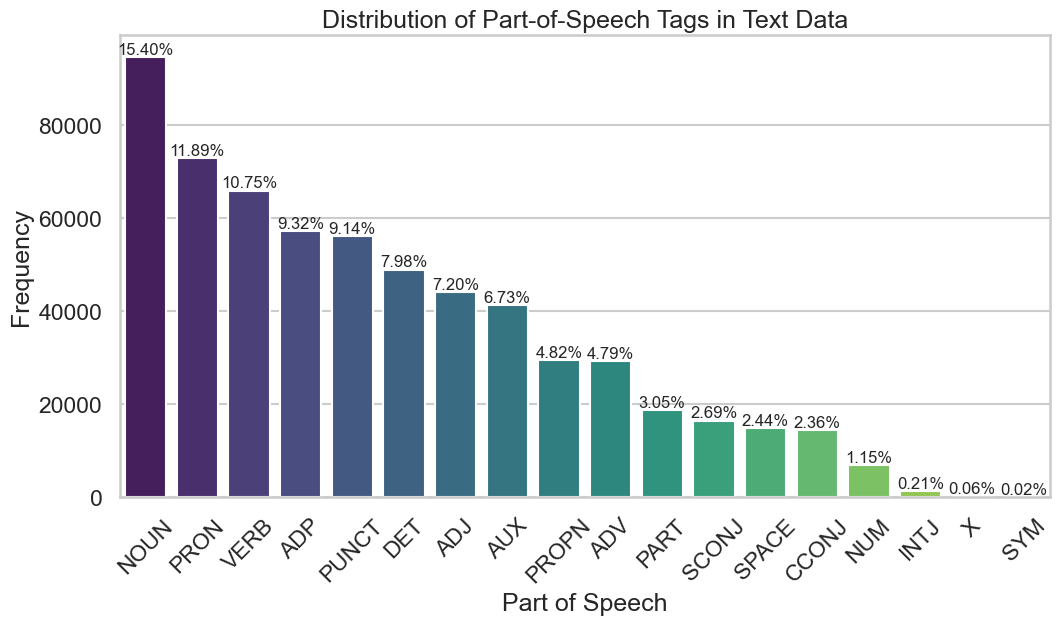

In [61]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Apply the POS tagging function to the text data
pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

# Flatten the list of lists into a single list of POS tags
pos_tags = [tag for sublist in pos_tags for tag in sublist]

# Count the occurrences of each POS tag
pos_counter = Counter(pos_tags)
pos_counts = pos_counter.most_common()

# Calculate the total number of POS tags
total_pos_tags = sum(pos_counter.values())

# Prepare the data for visualization
x, y = zip(*pos_counts)

# Visualize the distribution of POS tags
plt.figure(figsize=(12, 6))
sns.barplot(x=list(x), y=list(y), palette="viridis")

# Add percentages next to the bars with smaller font size
for i, (pos, freq) in enumerate(pos_counts):
    percentage = (freq / total_pos_tags) * 100
    plt.text(i, freq, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags in Text Data')
plt.xticks(rotation=45)
plt.show()

### Observations

#### **<span style="color: teal;"> Dominant POS Tags: </span>**
- NOUN has the highest frequency (15.40%), followed by PRON (pronouns, 11.89%) and VERB (10.75%). These tags are critical as they contribute to the core meaning and structure of the text.

#### **<span style="color: teal;"> Moderate Frequency Tags: </span>**
- Tags like ADP (adpositions, 9.32%), PUNCT (punctuation, 9.14%), DET (determiners, 7.98%), ADJ (adjectives, 7.20%), and AUX (auxiliary verbs, 6.73%) appear with notable frequency. They provide essential context, structure, and grammatical clarity.

#### **<span style="color: teal;"> Low Frequency Tags:</span>**
- SYM (symbols, 0.02%), INTJ (interjections, 0.06%), X (miscellaneous, 0.06%), and NUM (numerals, 1.15%) are rare and likely contribute less to semantic analysis.


What Can Stay:
- NOUN, VERB, ADJ, PRON, ADP: These tags are crucial for understanding the core meaning and relationships in the text.
- AUX, DET, ADV: These tags contribute to grammatical structure and provide important contextual information.
- PUNCT: While punctuation may seem less critical, it often indicates sentence boundaries and tone, which can be useful for tasks like sentence segmentation or sentiment analysis.

What Can Be Removed:
- SYM (symbols): Symbols are typically not meaningful in many NLP tasks and can be removed unless the dataset is technical or financial.
- INTJ (interjections): Interjections rarely add significant value unless the dataset is conversational or focused on emotions.
- SPACE: These are non-semantic and can be safely excluded during preprocessing.
- X (miscellaneous): This tag is often for tokens that don't fit standard POS categories and can be excluded if not relevant.



## **<span style="color: orange;"> Sentiment Analysis  </span>**

It would be interesting to analyze the sentiment classification of the text data. As an additional step, independent of our primary use case, we aim to assess the emotional tone of the messages exchanged during the negotiations. This will help us determine whether there is a trend toward more neutral, positive, or negative word choices used during the negotiation process. This is conducted in the next step as our final data exploration feature.

In [64]:
!pip install textblob

In [65]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Apply the sentiment analysis function to the 'Content' column
df['Sentiment'] = df['Content'].apply(calculate_sentiment)

# Categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

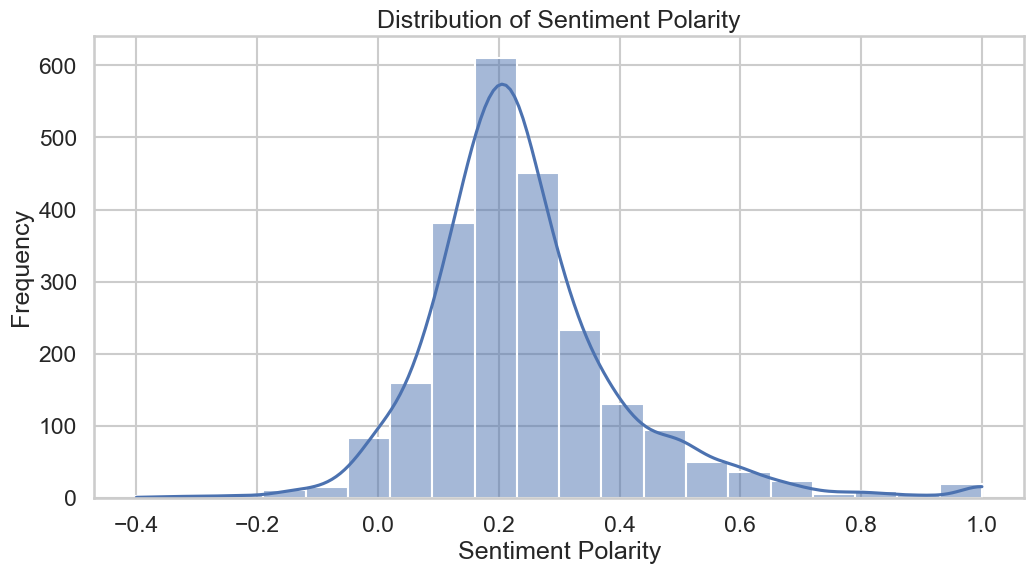

In [66]:
# Visualize the distribution of sentiment polarity scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True, palette='YlGnBu')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram reveals that most sentiment values cluster around 0.2, suggesting a generally positive tone in the text. The distribution skews slightly to the right, with a small number of highly positive sentiments approaching 1.0. Negative sentiments are notably rare, as evidenced by the minimal presence of values below 0.

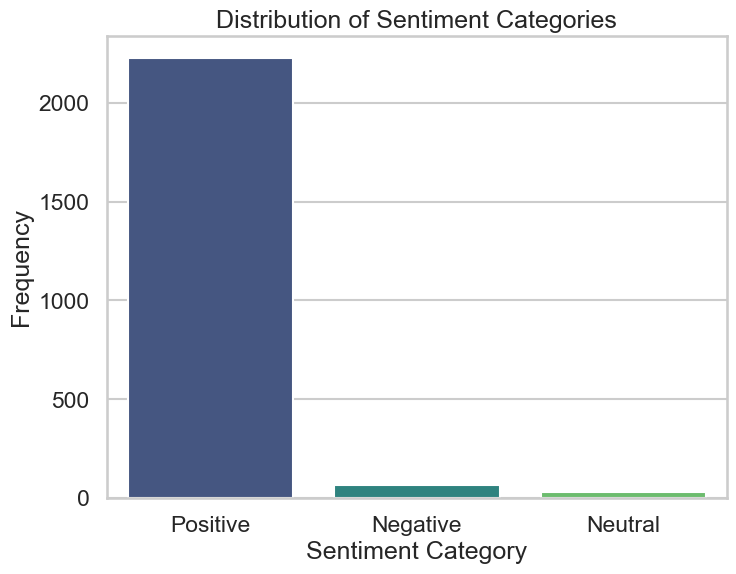

In [67]:
# Visualize the distribution of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(x='SentimentCategory', data=df, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

The bar chart displays the distribution of mainly positive sentiment. Negative sentiment is exceptionally rare, with very few occurrences, while neutral sentiment remains uncommon overall.

These observations reveal a strong predominance of positive sentiment in the dataset, which suggests a bias towards positive expressions or interactions. This imbalance in sentiment categories could potentially affect model performance, necessitating adjustments such as class balancing during training to ensure more accurate results, this could be the cause because of the opening and closings of each message by words like "Dear Mr.", "Best regards", "hope message finds well" etc.. Thus it would be important to employ some cleansing in the next chapter to ensure that this problem can be fixed.

# **<span style="color: orange;">2. Data Cleansing </span>**

<p style="text-align: justify;">
For the preprocessing step, we will clean the text to ensure it is ready for analysis by removing unwanted elements that could affect the performance of the NLP model. This includes converting the text to lowercase, removing special characters, URLs, HTML tags, and numbers in words. The goal is to prepare the text in a consistent and useful format so the model can focus on the meaningful content and perform more efficiently.
</p>

In [68]:
all_messages = df['Content']
all_messages

0       Dear Mr. Mendel, \nHope you are doing well! \n...
1       Dear Mr. Novak, \nThank you for reaching out t...
2       Dear Mr. Mendel, \nThank your kind response – ...
3       Dear Mr. Novak, \nThank you for your swift rep...
4       Dear Mr. Mendel, \nThank you for your proposal...
                              ...                        
2327    Dear Chis Meyer,\n \nthank you for your latest...
2328    Dear Alex Kramer,\nthank you very much for you...
2329    Dear Chris Meyer,\nthank you for your fast ans...
2330    Dear Alex Kramer,\nI am still very interested ...
2331    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2324, dtype: object

In [70]:
# check for duplicates again that have the identical words in content etc
duplicates = df[df.duplicated()]
duplicates

# where dropped already in the beginning of the script so no duplicates


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory


The first step in the cleansing process is to transform the text data to lowercase to ensure a consistent format. Additionally, special characters and punctuation should be removed, as they can influence the results.

In [71]:
def clean_text(message):
    #lowercasing and removal of special characters 
    message = message.lower()

    message = re.sub('\[.*?\]', '', message)
    message = re.sub('https?://\S+|www\.\S+', '', message)
    message = re.sub('<.*?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w*\d\w*', '', message)
    
    return message

In [72]:
df['Content'] = df['Content'].apply(lambda x: clean_text(x))
df['Content'].head()

0    dear mr mendel hope you are doing well as the ...
1    dear mr novak thank you for reaching out to me...
2    dear mr mendel thank your kind response – no n...
3    dear mr novak thank you for your swift reply i...
4    dear mr mendel thank you for your proposal and...
Name: Content, dtype: object

In [73]:
# Create now a df that can be used for later use in our modeling part focus here is only lowercasing and removing special characters
df_lowercasing = df.copy()
# Save DataFrame as a xlsx file
df_lowercasing.to_excel('df_lowercasing.xlsx', index=False)

<p style="text-align: justify;">
In this step, we are preparing the text by cleaning it further by removing greeting and closings since those may also influcene our results and would be seen as unimportant since its a standard way of a ngotiation message kind of like a fix wording that can be ignored. With this function we can remove common greetings and closings from text messages. These elements can be redundant in text analysis and may negatively impact model performance, as they do not add valuable information for the actual modell. Thats why, these parts of the text should be removed to enable more accurate analysis.
</p>

In [74]:
import re

def remove_greetings_and_closings(text):
    # Pattern to match "Dear Mr. [First Name]" or "Dear [First Name]"
    greetings = r"^(dear( mr| mrs| ms| dr| prof)?\.?\s?\w+,?|hi|hello|hey|good morning|good afternoon|good evening),?"
    closings = r"(best regards|yours sincerely|thank you|kind regards|regards|cheers),?"

    # Remove greetings and closings
    text = re.sub(greetings, '', text, flags=re.IGNORECASE)  # Remove greetings
    text = re.sub(closings, '', text, flags=re.IGNORECASE)  # Remove closings

    return text.strip()  # Remove leading/trailing whitespace

df['Content'] = df['Content'].apply(remove_greetings_and_closings)
df['Content']

0       hope you are doing well as the management of b...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your second s...
4       for your proposal and your efforts so far it s...
                              ...                        
2327    meyer  for your latest offer and some of your ...
2328    kramer very much for your latest offer i am ha...
2329    meyer for your fast answer i am happy that we ...
2330    krameri am still very interested in coming to ...
2331    meyer im so sorry but i can not  accept this t...
Name: Content, Length: 2324, dtype: object

In [75]:
# Now we create a df that can be used for later use in our modeling part focus here is only removing greetings and closings
df_without_greetings_and_closings = df.copy()
# Save DataFrame as a xlsx file
df_without_greetings_and_closings.to_excel('df_without_greetings_and_closings.xlsx', index=False)

<p style="text-align: justify;">
Another useful approach is to remove names and entities as we realized earlier in the exploration, such as specific countries or organizations, as these words may influence the outcomes. To address this, we will apply a function to the dataframe that removes all named entities (e.g., names of people, organizations, locations) from the text messages. As shown during the exploration phase, named entities constitute a small percentage of the total word count, so their removal is unlikely to significantly impact the analysis. To ensure robustness and evaluate potential changes in model performance, we will save different Excel files for testing and comparison.
</p>

In [76]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def remove_named_entities(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.ent_type_ not in ['PERSON', 'ORG']] # define which entities to remove and which to keep to not alter results too much
    return " ".join(tokens)

df['Content'] = df['Content'].apply(remove_named_entities)
df['Content']

0       hope you are doing well as the management of b...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your second s...
4       for your proposal and your efforts so far it s...
                              ...                        
2327       for your latest offer and some of your poin...
2328    very much for your latest offer i am happy tha...
2329    meyer for your fast answer i am happy that we ...
2330    still very interested in coming to a joint res...
2331      i m so sorry but i can not   accept this thi...
Name: Content, Length: 2324, dtype: object

In [77]:
# Now we create a df that can be used for later use in our modeling part focus here is only removing greetings and closings
df_without_named_entities = df.copy()
# Save DataFrame as a xlsx file
df_without_named_entities.to_excel('df_without_named_entities.xlsx', index=False)

Since now after cleaning out the opening and closings some rows with few words building a message will be filtered out automatically and can be removed if the string is empty.

In [78]:
# print out the rows that have empty content
df[df['Content'] == '']


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
552,2057,2058,FinalAccept,FinalAccept,,29,4,29,1,5,1,1.0,Positive
857,3457,3458,Counteroffer,FinalAccept,,1,1,1,1,1,1,0.0,Neutral
1247,103,104,Offer,FinalAccept,,8,2,8,1,3,1,0.5,Positive
1404,133,134,FinalReject,FinalReject,,1,1,1,1,1,0,0.0,Neutral


We note that we have 4 rows with empty content. This is caused because of the cleansing part. We will remove them from the dataset.

In [79]:
#drop the rows with empty content
df = df[df['Content'] != '']

In [80]:
df # now only 2320 observations remain for the cleansed dataset

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
0,70,69,Offer,FinalAccept,hope you are doing well as the management of b...,2529,429,2529,17,470,1,0.213699,Positive
1,69,70,Counteroffer,FinalAccept,for reaching out to mei apologize for the slig...,2579,439,2579,21,483,1,0.165002,Positive
2,70,69,Counteroffer,FinalAccept,r kind response – no need to hurry i guess we ...,2336,409,2336,15,454,1,0.222533,Positive
3,69,70,Counteroffer,FinalAccept,for your swift reply i have read your second s...,1961,345,1961,13,381,1,0.160333,Positive
4,70,69,Counteroffer,FinalAccept,for your proposal and your efforts so far it s...,1917,343,1917,10,376,1,0.122500,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,for your latest offer and some of your poin...,1755,338,1755,21,358,0,0.285340,Positive
2328,856,851,Counteroffer,FinalReject,very much for your latest offer i am happy tha...,1460,263,1460,17,294,0,0.282807,Positive
2329,851,856,Counteroffer,FinalReject,meyer for your fast answer i am happy that we ...,673,133,673,10,144,0,0.251786,Positive
2330,856,851,Counteroffer,FinalReject,still very interested in coming to a joint res...,969,171,969,9,191,0,0.163158,Positive


In [81]:
# Filter the observations where the word count is less than 6 but we can play and increase decrease the intervall to find some nice insights
filtered_df = df[df['Word_Count_nltk'] < 6]

# Print the filtered observations again to see the changes in the dataset
filtered_df

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
77,237,238,FinalAccept,FinalAccept,we accept,9,2,9,1,2,1,0.00,Neutral
351,1273,1274,Counteroffer,FinalReject,see offer,14,3,14,1,5,0,0.00,Neutral
1400,133,134,Offer,FinalReject,accept my kind offer,23,4,23,1,5,0,0.75,Positive
1789,241,242,FinalAccept,FinalAccept,final accept,13,2,13,1,3,1,0.00,Neutral
1942,314,313,FinalAccept,FinalAccept,de,2,1,2,1,1,1,0.00,Neutral
2152,1316,1312,FinalReject,FinalReject,reject,6,1,6,1,1,0,0.00,Neutral


We note that rows containing only dots (“.”) or purely openings and closings were removed in the initial data cleaning phase. However, some rows with minimal content remain in the dataset. These will be incuded in the analysis because, even when short, they may carry semantic value relevant to the negotiation process. For example, short responses or single words like “We accept” “reject” or “final accept” can play a crucial role in shaping the direction and tone of negotiations. Retaining these entries aligns with negotiation literature, which emphasizes the importance of even minimal linguistic cues in understanding communication strategies, agreement-building, and decision-making dynamics.

In [82]:
# use autocorrect package to correct the spelling mistakes takes quite some time to run
# pip install autocorrect

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<p style="text-align: justify;">
Here we create a function to correct spelling mistakes in text messages.
Previous analysis revealed that the text contains spelling errors, which can negatively affect text analysis
and model performance. Therefore, I want to ensure the text is free of spelling mistakes to improve the accuracy of
further analysis and predictions.</p>


In [84]:
#takes a while to load 
from autocorrect import Speller

spell = Speller(lang='en')

df['Content'] = df['Content'].apply(lambda x: " ".join([spell(word) for word in x.split()]))
df['Content']

In [85]:
# Now we create a df that can be used for later use in our modeling part focus here is autocorrecting
df_autocorrected = df.copy()
# Save DataFrame as a xlsx file
df_autocorrected.to_excel('df_autocorrected.xlsx', index=False)

## **<span style="color: orange;">3. Data Preprocessing</span>**

Data preprocessing is the next essential step we will conduct that serves as the foundation for ensuring the quality and interpretability of our textual data. Raw text often contains noise, such as unwanted characters, irrelevant words, or inconsistent formatting what we observed before and which can hinder machine understanding and subsequent analysis. By applying systematic preprocessing techniques we aim to transforme it into a structured, machine-readable format so it can be applicable on several machine learning models.

In the given data we will use common processes such as tokenization, stemming, lemmatization, and stop-word removal that are also being used in several scientific works. The sequence in which these techniques are applied can significantly impact the results, as the interdependencies between steps influence how the data is prepared for subsequent feature extraction or modeling (Tabassum et. al 2020, p.4864 ff.).

<p style="text-align: justify;">
Here we apply lemmatization to the text to change words into their base or dictionary form (called a lemma). This makes sure that different forms of a word are treated the same when analyzing the text, which helps improve the model’s accuracy. For example, words like “running” or “ran” will be changed to “run”, and “better” or “best” will be changed to “good”. Lemmatization helps to make the text more consistent and easier to analyze.
</p>


In [86]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['Content'] = df['Content'].apply(lemmatize_text)
df['Content']

0       hope you are doing well a the management of bo...
1       for reaching out to mei apologize for the slig...
2       r kind response – no need to hurry i guess we ...
3       for your swift reply i have read your second s...
4       for your proposal and your effort so far it se...
                              ...                        
2327    for your latest offer and some of your point i...
2328    very much for your latest offer i am happy tha...
2329    meyer for your fast answer i am happy that we ...
2330    still very interested in coming to a joint res...
2331    i m so sorry but i can not accept this this is...
Name: Content, Length: 2320, dtype: object

<p style="text-align: justify;">
In this step, we use tokenization to break the text into individual words or tokens. This helps the model understand and work with smaller, meaningful parts of the text. The tokenizer we’re using looks for sequences of letters, numbers, and underscores, which means it will separate words and ignore punctuation.In this step, we use tokenization to break the text into individual words or tokens. This helps the model understand and work with smaller, meaningful parts of the text. The tokenizer we’re using looks for sequences of letters, numbers, and underscores, which means it will separate words and ignore punctuation.</p>

In [87]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['Content'] = df['Content'].apply(lambda x:tokenizer.tokenize(x))
df['Content'].head()

0    [hope, you, are, doing, well, a, the, manageme...
1    [for, reaching, out, to, mei, apologize, for, ...
2    [r, kind, response, no, need, to, hurry, i, gu...
3    [for, your, swift, reply, i, have, read, your,...
4    [for, your, proposal, and, your, effort, so, f...
Name: Content, dtype: object

In [88]:
import nltk
#nltk.download('stopwords')

In [89]:
from nltk.corpus import stopwords

# creating a list of stopwords
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In the next step, we remove stopwords and tokenize the words of the text. Stopwords are common words like "and", "the", "is", etc., that don't add much meaning in text analysis. By removing them, we can focus on the more important words in the text, which can help improve the accuracy of our analysis and model.

In [90]:
from nltk.corpus import stopwords

# function for removing stopwords
def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words
    
df['Content'] = df['Content'].apply(lambda x:remove_stopwords(x))
df['Content'].head()

0    [hope, well, management, company, agreed, buil...
1    [reaching, mei, apologize, slight, delay, gett...
2    [r, kind, response, need, hurry, guess, face, ...
3    [swift, reply, read, second, set, proposal, di...
4    [proposal, effort, far, seems, getting, close,...
Name: Content, dtype: object

In [91]:
# apply word tokenizer from nltk
import nltk
nltk.download('wordnet')

# treebank tokenizer to handle contractions like "don't" or "isn't" etc.
tokenizer = nltk.tokenize.TreebankWordTokenizer()
df['Content'] = df['Content'].apply(lambda x:tokenizer.tokenize(" ".join(x))) # words are joined to be tokenized 
df['Content'].head()

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [hope, well, management, company, agreed, buil...
1    [reaching, mei, apologize, slight, delay, gett...
2    [r, kind, response, need, hurry, guess, face, ...
3    [swift, reply, read, second, set, proposal, di...
4    [proposal, effort, far, seems, getting, close,...
Name: Content, dtype: object

In [92]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x: combine_text(x))
df['Content']

0       hope well management company agreed building f...
1       reaching mei apologize slight delay getting ba...
2       r kind response need hurry guess face daily fi...
3       swift reply read second set proposal discussed...
4       proposal effort far seems getting close resolv...
                              ...                        
2327    latest offer point completly let u take corpor...
2328    much latest offer happy could already reached ...
2329    meyer fast answer happy found solution four is...
2330    still interested coming joint result neverthel...
2331    sorry accept less understand argument like las...
Name: Content, Length: 2320, dtype: object

Here we combine the text back into a single string after it has been split into individual words or tokens. This is important because we may have split the text into tokens (words) during previous steps, but now we want to join them back together to form the full text again.

In [93]:
corpus =[]
new = df['Content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
corpus

['hope',
 'well',
 'management',
 'company',
 'agreed',
 'building',
 'fruitful',
 'partnership',
 'face',
 'upcoming',
 'disruption',
 'market',
 'best',
 'innovation',
 'green',
 'spirit',
 'would',
 'like',
 'introduce',
 'sasa',
 'novak',
 'reaching',
 'tighten',
 'general',
 'term',
 'hurm',
 'ag',
 'established',
 'first',
 'round',
 'discussion',
 'far',
 'please',
 'find',
 'attached',
 'proposal',
 'open',
 'issue',
 'joint',
 'venture',
 'would',
 'like',
 'explain',
 'following',
 'director',
 'first',
 'would',
 'like',
 'address',
 'unsolved',
 'issue',
 'number',
 'director',
 'sent',
 'since',
 'agreed',
 'decisionmaking',
 'committee',
 'consisting',
 'member',
 'simple',
 'majority',
 'power',
 'strongly',
 'suggest',
 'dividing',
 'seat',
 'svn',
 'tech',
 'would',
 'able',
 'deal',
 'local',
 'authority',
 'partner',
 'successfully',
 'using',
 'strong',
 'local',
 'network',
 'relationship',
 'engineer',
 'develop',
 'thorough',
 'convenient',
 'product',
 'sharing'

Lastly we are creating a corpus, which is a collection of all the words from the text data. A corpus is useful because it gives us a list of all the words across all the text entries, which can be used for further analysis like word frequency counting or building a vocabulary.

In [94]:
len(corpus) # 246505 unique words in the corpus

246505

In [95]:
# Now we create a df that includes even some preprocessing steps to use it for later use in our modeling part
df_complete_cleansing = df.copy()

# List of columns to keep
columns_to_keep = ['SenderID', 'ReceiverID', 'ActionType', 'NegoOutcome', 'Content']

# Create a new DataFrame with only the specified columns
df_complete_cleansing_columns = df_complete_cleansing[columns_to_keep]

# Save the new DataFrame as a xlsx file
df_complete_cleansing_columns.to_excel('df_complete_cleansing_columns.xlsx', index=False)

In [ ]:
# make the same removal of columns for the other dfs
df_lowercasing_columns = df_lowercasing[columns_to_keep]
df_without_greetings_and_closings_columns = df_without_greetings_and_closings[columns_to_keep]
df_without_named_entities_columns = df_without_named_entities[columns_to_keep]
df_autocorrected_columns = df_autocorrected[columns_to_keep]

#also save them as xlsx files
df_lowercasing_columns.to_excel('df_lowercasing_columns.xlsx', index=False)
df_without_greetings_and_closings_columns.to_excel('df_without_greetings_and_closings_columns.xlsx', index=False)
df_without_named_entities_columns.to_excel('df_without_named_entities_columns.xlsx', index=False)
df_autocorrected_columns.to_excel('df_autocorrected_columns.xlsx', index=False)


This was the first notebook file. All the parts here are necessary to continue with the 4th topic of our agenda, the ex post analysis of the initial data in comparison to the cleansed data. This should help us understand some of the implications that we had in mind and also help us identify more patterns and better or possible explanations for some future interpretations.

# <span style="color: orange;">References</span>

- Gaikwad, S. V., Chaugule, A., & Patil, P. (2014). Text mining methods and techniques. International Journal of Computer Applications, 85(17).

- Khurana, D., Koli, A., Khatter, K. et al. Natural language processing: state of the art, current trends and challenges. Multimed Tools Appl 82, 3713–3744 (2023). https://doi.org/10.1007/s11042-022-13428-4

- Searle, J. R., Kiefer, F., & Bierwisch, M. (Eds.). (1980). Speech act theory and pragmatics (Vol. 10). Dordrecht: D. Reidel.

- Tabassum, A., & Patil, R. R. (2020). A survey on text pre-processing and feature extraction techniques in natural language processing. International Research Journal of Engineering and Technology (IRJET), 7(6), 4864. https://www.irjet.net

- Tong, Zhou & Zhang, Haiyi. (2016). A Text Mining Research Based on LDA Topic Modelling. Computer Science & Information Technology. 6. 201-210. 10.5121/csit.2016.60616. 




